In [1]:
import os
import json
import pandas as pd  # 1.5.0

from rdkit import Chem  # 2023.03.3
from rdkit.Chem.Draw import IPythonConsole, MolToImage
from rdkit.Chem.rdmolops import GetDistanceMatrix
from tqdm import tqdm
import matplotlib.pyplot as plt

from collections import defaultdict, Counter
import statistics

from structure_functions import *

# Deactivate rdkit messages:
from rdkit import RDLogger   
RDLogger.DisableLog("rdApp.*")

DATA_DIRECTORY_PATH = os.path.join((os.path.split(os.getcwd())[0]), "data")

# 0. Load dataset

In [2]:
# import dataset:
df = pd.read_csv(os.path.join(DATA_DIRECTORY_PATH, "FIA49k.csv"))
df.shape

# filter dataset:
df = df[df["mol_type"] == "fia44k"]

print(f"Compounds in Dataset: {len(df)}")

Compounds in Dataset: 44877


In [3]:
def draw_boxplots(vals, labels, xlabel = "", ylabel = "", title = "", size = None, save_as = None):
    if size is not None:
        plt.figure().set_figheight(size)
    plt.boxplot(vals, vert = False, labels = labels)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if save_as is not None:
        plt.savefig(save_as)
    plt.show()

def get_shortest_distance(sub_smiles, central_atom, la_smiles, counter):
    mol = Chem.MolFromSmiles(la_smiles)
    distances = GetDistanceMatrix(mol)
    # HACK: speaks for itself...
    # needed since [X,x] notation does not work for i.e. Al
    search_string = f"[#{Chem.MolFromSmarts(f"[{central_atom}]").GetAtomWithIdx(0).GetAtomicNum()}]"
    ca_index = mol.GetSubstructMatch(Chem.MolFromSmarts(search_string))[0]

    res = []
    min_distance = mol.GetNumAtoms()
    for sub_smi in sub_smiles:
        sub_smi_mol = Chem.MolFromSmiles(sub_smi)
        p = Chem.AdjustQueryParameters.NoAdjustments()
        p.makeDummiesQueries = True
        sub = Chem.AdjustQueryProperties(sub_smi_mol, p)
        for idx in mol.GetSubstructMatch(sub):
            curr_distance = distances[ca_index][idx]
            if curr_distance < min_distance:
                min_distance = curr_distance
        if min_distance == mol.GetNumAtoms():
            counter["not_found"] += 1
            if counter["not_found"] >= 20:
                print(counter)
                raise ValueError(f"Too many substructures not found. Aborting.")
            print(f"Found no substructure match for main smiles {la_smiles} and substructure SMILES {sub_smi}!")
            print(f"Main mol:")
            display(MolToImage(mol))
            print(f"Substructure SMILES mol:")
            display(MolToImage(sub_smi_mol))
            print(f"SMILES: {la_smiles}")
            print(f"Substructure SMILES: {sub_smi}")
        else:
            counter["found"] += 1
        res.append(min_distance)
    return res

# 1. Analyze substructures of radius 1

### 1.1 Search for substructures

  0%|                                                                                                                                              | 0/44877 [00:00<?, ?it/s]

Found no substructure match for main smiles [H]c1c([H])c(C2=C(C(F)(F)F)C(F)(F)S[Al]2N(C([H])([H])[H])C([H])([H])[H])c([H])c([H])c1Br and substructure SMILES */[C]=C(/C(*)(F)F)C(F)(F)F!
Main mol:


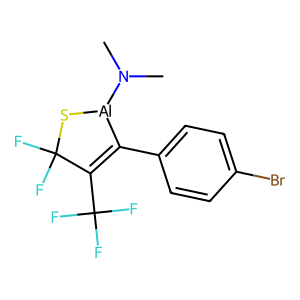

Substructure SMILES mol:


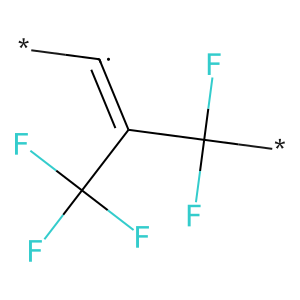

SMILES: [H]c1c([H])c(C2=C(C(F)(F)F)C(F)(F)S[Al]2N(C([H])([H])[H])C([H])([H])[H])c([H])c([H])c1Br
Substructure SMILES: */[C]=C(/C(*)(F)F)C(F)(F)F
Found no substructure match for main smiles [H]c1c([H])c(C2=C(C(F)(F)F)C(F)(F)S[Al]2N(C([H])([H])[H])C([H])([H])[H])c([H])c([H])c1Br and substructure SMILES *C(*)=[C]C(:*):*!
Main mol:


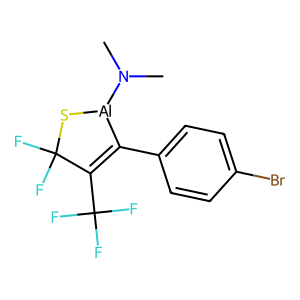

Substructure SMILES mol:


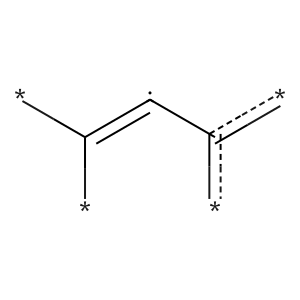

SMILES: [H]c1c([H])c(C2=C(C(F)(F)F)C(F)(F)S[Al]2N(C([H])([H])[H])C([H])([H])[H])c([H])c([H])c1Br
Substructure SMILES: *C(*)=[C]C(:*):*
Found no substructure match for main smiles [H]c1c([H])c(C2=C(C(F)(F)F)C(F)(F)S[Al]2N(C([H])([H])[H])C([H])([H])[H])c([H])c([H])c1Br and substructure SMILES C[N]C!
Main mol:


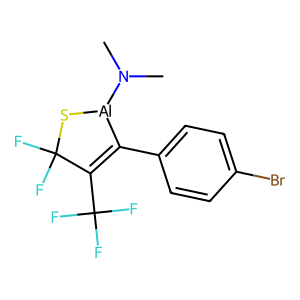

Substructure SMILES mol:


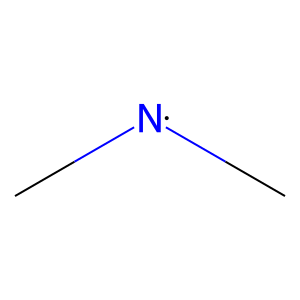

  0%|                                                                                                                                    | 1/44877 [00:00<1:36:13,  7.77it/s]

SMILES: [H]c1c([H])c(C2=C(C(F)(F)F)C(F)(F)S[Al]2N(C([H])([H])[H])C([H])([H])[H])c([H])c([H])c1Br
Substructure SMILES: C[N]C
Found no substructure match for main smiles [H]C([H])=C([H])[Al]1C(Cl)=NC(C(F)(F)F)(C(F)(F)F)N1[H] and substructure SMILES *=NC([NH])(C(F)(F)F)C(F)(F)F!
Main mol:


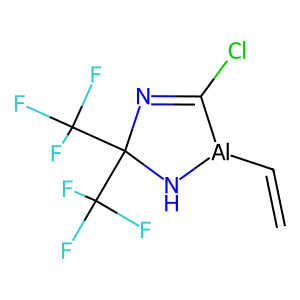

Substructure SMILES mol:


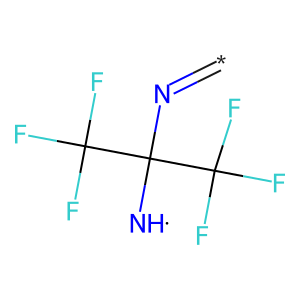

SMILES: [H]C([H])=C([H])[Al]1C(Cl)=NC(C(F)(F)F)(C(F)(F)F)N1[H]
Substructure SMILES: *=NC([NH])(C(F)(F)F)C(F)(F)F
Found no substructure match for main smiles [H]C([H])=C([H])[Al]1C(Cl)=NC(C(F)(F)F)(C(F)(F)F)N1[H] and substructure SMILES *C(*)(*)/N=[C]/Cl!
Main mol:


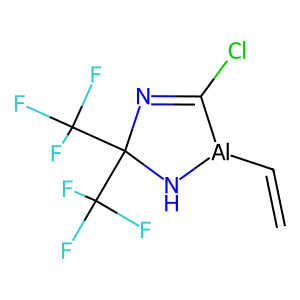

Substructure SMILES mol:


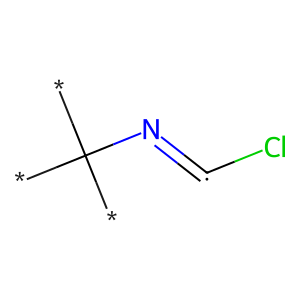

SMILES: [H]C([H])=C([H])[Al]1C(Cl)=NC(C(F)(F)F)(C(F)(F)F)N1[H]
Substructure SMILES: *C(*)(*)/N=[C]/Cl
Found no substructure match for main smiles [H]C([H])=C([H])[Al]1C(Cl)=NC(C(F)(F)F)(C(F)(F)F)N1[H] and substructure SMILES [CH]=C!
Main mol:


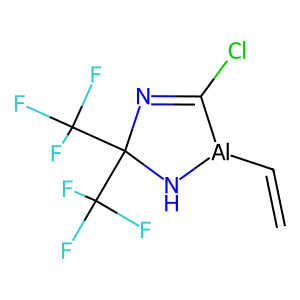

Substructure SMILES mol:


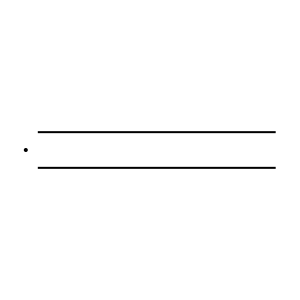

SMILES: [H]C([H])=C([H])[Al]1C(Cl)=NC(C(F)(F)F)(C(F)(F)F)N1[H]
Substructure SMILES: [CH]=C
Found no substructure match for main smiles [H]C([H])([H])S[Al]1OC([H])([H])c2nc(C([H])(C([H])([H])[H])C([H])([H])[H])c(C([H])(C([H])([H])[H])C([H])([H])[H])n21 and substructure SMILES *C(=*)C[O]!
Main mol:


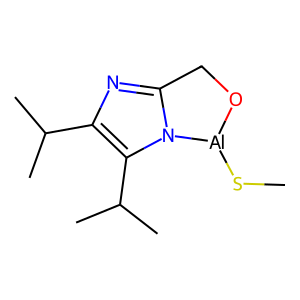

Substructure SMILES mol:


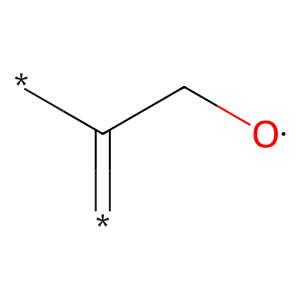

SMILES: [H]C([H])([H])S[Al]1OC([H])([H])c2nc(C([H])(C([H])([H])[H])C([H])([H])[H])c(C([H])(C([H])([H])[H])C([H])([H])[H])n21
Substructure SMILES: *C(=*)C[O]
Found no substructure match for main smiles [H]C([H])([H])S[Al]1OC([H])([H])c2nc(C([H])(C([H])([H])[H])C([H])([H])[H])c(C([H])(C([H])([H])[H])C([H])([H])[H])n21 and substructure SMILES *C(=*)C(C)C!
Main mol:


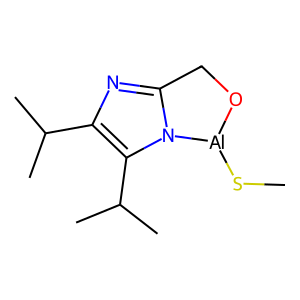

Substructure SMILES mol:


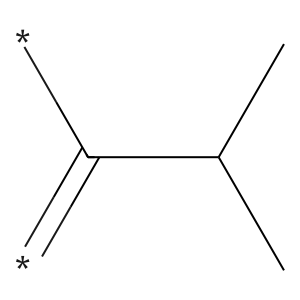

SMILES: [H]C([H])([H])S[Al]1OC([H])([H])c2nc(C([H])(C([H])([H])[H])C([H])([H])[H])c(C([H])(C([H])([H])[H])C([H])([H])[H])n21
Substructure SMILES: *C(=*)C(C)C
Found no substructure match for main smiles [H]C([H])([H])S[Al]1OC([H])([H])c2nc(C([H])(C([H])([H])[H])C([H])([H])[H])c(C([H])(C([H])([H])[H])C([H])([H])[H])n21 and substructure SMILES *C(=*)C(C)C!
Main mol:


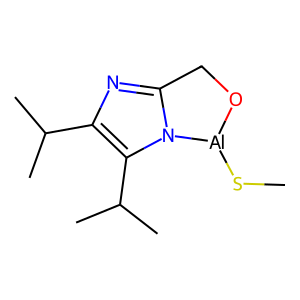

Substructure SMILES mol:


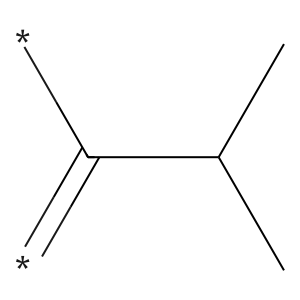

SMILES: [H]C([H])([H])S[Al]1OC([H])([H])c2nc(C([H])(C([H])([H])[H])C([H])([H])[H])c(C([H])(C([H])([H])[H])C([H])([H])[H])n21
Substructure SMILES: *C(=*)C(C)C
Found no substructure match for main smiles [H]C([H])([H])S[Al]1OC([H])([H])c2nc(C([H])(C([H])([H])[H])C([H])([H])[H])c(C([H])(C([H])([H])[H])C([H])([H])[H])n21 and substructure SMILES C[S]!
Main mol:


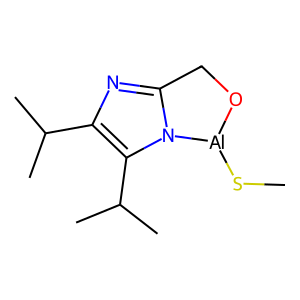

Substructure SMILES mol:


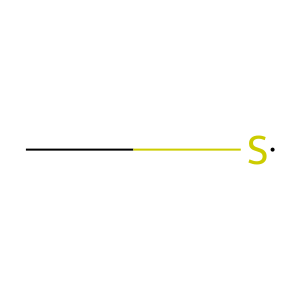

  0%|                                                                                                                                      | 3/44877 [00:00<53:34, 13.96it/s]

SMILES: [H]C([H])([H])S[Al]1OC([H])([H])c2nc(C([H])(C([H])([H])[H])C([H])([H])[H])c(C([H])(C([H])([H])[H])C([H])([H])[H])n21
Substructure SMILES: C[S]
Found no substructure match for main smiles [H]C([H])([H])S[Al]1SC(F)(F)C(C([H])([H])[H])=C1C(=C(C([H])([H])[H])C([H])([H])[H])C([H])([H])[H] and substructure SMILES C[S]!
Main mol:


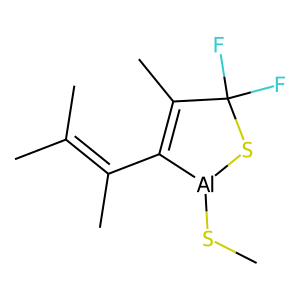

Substructure SMILES mol:


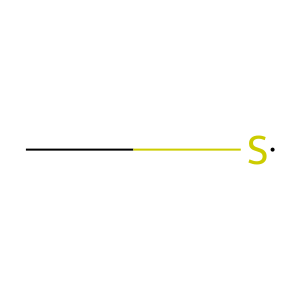

SMILES: [H]C([H])([H])S[Al]1SC(F)(F)C(C([H])([H])[H])=C1C(=C(C([H])([H])[H])C([H])([H])[H])C([H])([H])[H]
Substructure SMILES: C[S]
Found no substructure match for main smiles [H]c1nc(I)c2n1[Al](SC([H])([H])[H])SC2=O and substructure SMILES *C(=*)C(=O)[S]!
Main mol:


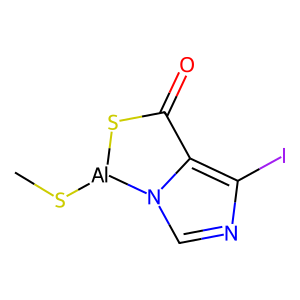

Substructure SMILES mol:


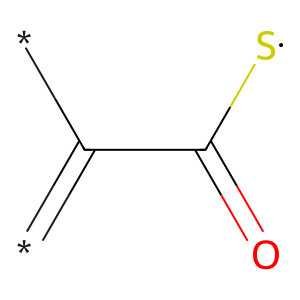

SMILES: [H]c1nc(I)c2n1[Al](SC([H])([H])[H])SC2=O
Substructure SMILES: *C(=*)C(=O)[S]
Found no substructure match for main smiles [H]c1nc(I)c2n1[Al](SC([H])([H])[H])SC2=O and substructure SMILES *C(=*)I!
Main mol:


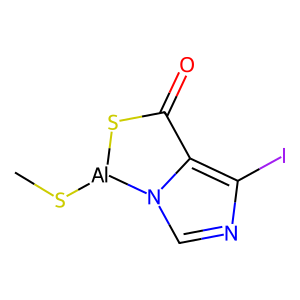

Substructure SMILES mol:


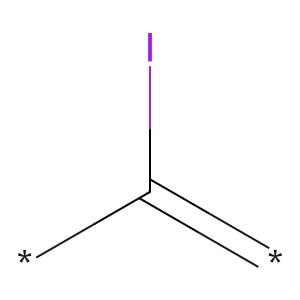

SMILES: [H]c1nc(I)c2n1[Al](SC([H])([H])[H])SC2=O
Substructure SMILES: *C(=*)I
Found no substructure match for main smiles [H]c1nc(I)c2n1[Al](SC([H])([H])[H])SC2=O and substructure SMILES C[S]!
Main mol:


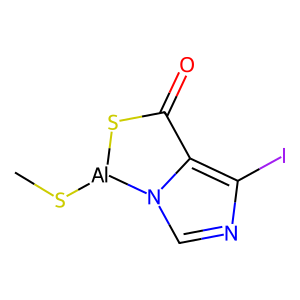

Substructure SMILES mol:


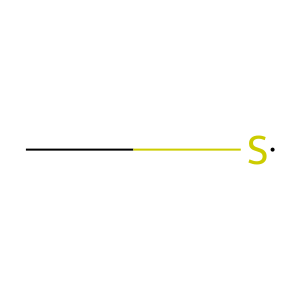

SMILES: [H]c1nc(I)c2n1[Al](SC([H])([H])[H])SC2=O
Substructure SMILES: C[S]
Found no substructure match for main smiles [H]c1c([H])c(C([H])(C([H])([H])[H])C([H])([H])[H])c([H])c2c1[Al](SC([H])([H])[H])n1c(OC([H])([H])[H])nc(OC([H])([H])[H])c1S2 and substructure SMILES *C(=*)OC!
Main mol:


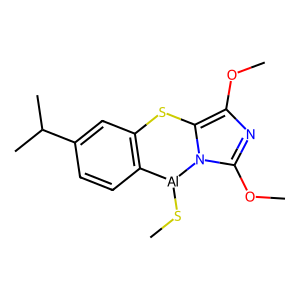

Substructure SMILES mol:


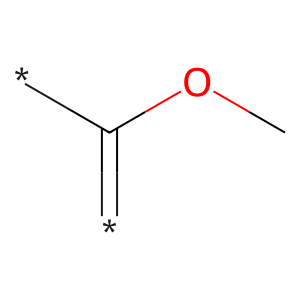

SMILES: [H]c1c([H])c(C([H])(C([H])([H])[H])C([H])([H])[H])c([H])c2c1[Al](SC([H])([H])[H])n1c(OC([H])([H])[H])nc(OC([H])([H])[H])c1S2
Substructure SMILES: *C(=*)OC
Found no substructure match for main smiles [H]c1c([H])c(C([H])(C([H])([H])[H])C([H])([H])[H])c([H])c2c1[Al](SC([H])([H])[H])n1c(OC([H])([H])[H])nc(OC([H])([H])[H])c1S2 and substructure SMILES *C(=*)OC!
Main mol:


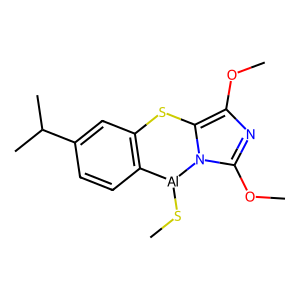

Substructure SMILES mol:


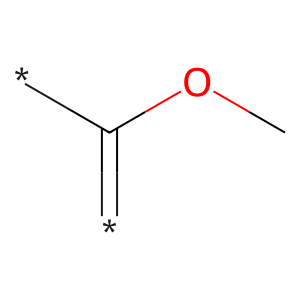

SMILES: [H]c1c([H])c(C([H])(C([H])([H])[H])C([H])([H])[H])c([H])c2c1[Al](SC([H])([H])[H])n1c(OC([H])([H])[H])nc(OC([H])([H])[H])c1S2
Substructure SMILES: *C(=*)OC
Found no substructure match for main smiles [H]c1c([H])c(C([H])(C([H])([H])[H])C([H])([H])[H])c([H])c2c1[Al](SC([H])([H])[H])n1c(OC([H])([H])[H])nc(OC([H])([H])[H])c1S2 and substructure SMILES *C(=*)SC(:*):*!
Main mol:


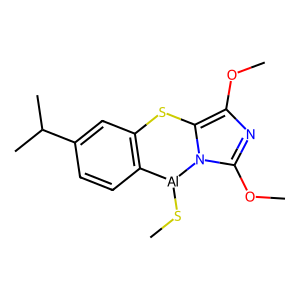

Substructure SMILES mol:


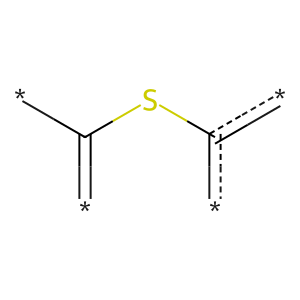

SMILES: [H]c1c([H])c(C([H])(C([H])([H])[H])C([H])([H])[H])c([H])c2c1[Al](SC([H])([H])[H])n1c(OC([H])([H])[H])nc(OC([H])([H])[H])c1S2
Substructure SMILES: *C(=*)SC(:*):*
Found no substructure match for main smiles [H]c1c([H])c(C([H])(C([H])([H])[H])C([H])([H])[H])c([H])c2c1[Al](SC([H])([H])[H])n1c(OC([H])([H])[H])nc(OC([H])([H])[H])c1S2 and substructure SMILES C[S]!
Main mol:


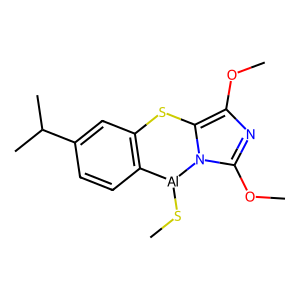

Substructure SMILES mol:


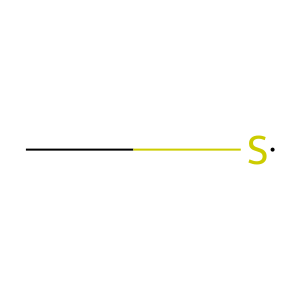

  0%|                                                                                                                                      | 6/44877 [00:00<37:23, 20.00it/s]

SMILES: [H]c1c([H])c(C([H])(C([H])([H])[H])C([H])([H])[H])c([H])c2c1[Al](SC([H])([H])[H])n1c(OC([H])([H])[H])nc(OC([H])([H])[H])c1S2
Substructure SMILES: C[S]
Found no substructure match for main smiles [H]c1c([H])c(OC([H])([H])[H])c2c(c1[H])S[Al](OC([H])([H])[H])OC2([H])[H] and substructure SMILES *:C(:*)C[O]!
Main mol:


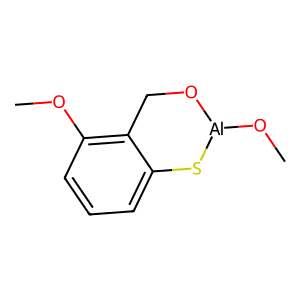

Substructure SMILES mol:


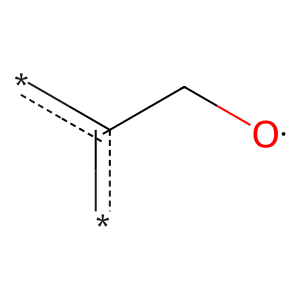

  0%|                                                                                                                                      | 6/44877 [00:00<44:17, 16.88it/s]

SMILES: [H]c1c([H])c(OC([H])([H])[H])c2c(c1[H])S[Al](OC([H])([H])[H])OC2([H])[H]
Substructure SMILES: *:C(:*)C[O]
Counter({'not_found': 20, 'found': 8})


ValueError: Too many substructures not found. Aborting.

In [4]:
radius = 1

substructures = defaultdict(lambda: [[], [], 0.])

counter = Counter({"found": 0, "not_found": 0})
# write all substructures in list:
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    smiles = row["ligand_smiles"].split(".")
    elem = substructures[row["Compound"]]
    elem[2] = row["fia_solv-PBEh3c"]
    for smi in smiles:
        sub_smiles = getSubSmilesRadN(Chem.MolFromSmiles(smi), radius)
        elem[0].extend((sub_smiles, radius))
        elem[1].extend(get_shortest_distance(sub_smiles, row["ca"], row["la_smiles"], counter))
    substructures[row["Compound"]] = elem
print(counter)

with open("substructures.json", "w") as f:
    #json.dump(substructure_list, f)
    json.dump(substructures, f)

### 1.2 Draw substructures

In [21]:
# load substructure_list:
with open("substructures.json", "r") as f:
    substructures_json = json.load(f)

# count substructures and append FIA values:
#substructure_counts = defaultdict(int)
#for i in substructure_list:
#    if i:
#        substructure_counts[i] += 1

# two-tuple of list of FIAs and substructure count
substructures = defaultdict(lambda: [[], 0])
for properties in substructures_json.values():
    # these are the substructures
    for substruct in properties[0]:
        substructures[substruct][0].append(properties[1])
        substructures[substruct][1] += 1

# sort substructure_counts by counts:
substructures = dict(sorted(substructures.items(), key=lambda item: item[1][1], reverse=True))
#substructure_counts = dict(sorted(substructure_counts.items(), key=lambda item: item[1], reverse=True))

# draw substructures:
smiles = list(substructures.keys())
counts = [str(x[1]) for x in substructures.values()]
mols = [Chem.MolFromSmiles(x) for x in smiles]

num_draw_compounds = 50
#display(Chem.Draw.MolsToGridImage(mols[:num_draw_compounds], molsPerRow=10, legends=counts[:num_draw_compounds], useSVG=True, maxMols=num_draw_compounds))

substructures_highest_fia = dict(sorted(substructures.items(), key= lambda item: statistics.fmean(item[1][0]), reverse=True))

num_highest_fia = 500
min_count = 7

vals = []
labels = []
legends = []
mols = []
for i, (k, v) in enumerate(tuple(substructures_highest_fia.items())[:num_highest_fia]):
    if v[1] < min_count:
        continue
    vals.append(v[0])
    labels.append(f"Substructure {i}")
    legends.append(f"Substructure {i}: {k}\nCount: {v[1]}, Mean FIA: {statistics.fmean(v[0]):.1f}")
    mols.append(Chem.MolFromSmiles(k))

draw_boxplots(vals, labels, size = len(labels) / 2)
display(Chem.Draw.MolsToGridImage(mols, molsPerRow=6, legends=legends, useSVG=True, maxMols = len(labels)))

TypeError: unhashable type: 'list'

# 2. Analyze ring systems

### 2.1 Search for ring systems

In [9]:
ringsystems = defaultdict(lambda: [[], 0.])

for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    smiles = row["ligand_smiles"].split(".")
    elem = ringsystems[row["Compound"]]
    elem[1] = row["fia_solv-PBEh3c"]
    for smi in smiles:
        elem[0].extend(getRingSystemSmiles(Chem.MolFromSmiles(smi)))

with open("ringsystem.json", "w") as f:
    json.dump(ringsystems, f)

100%|████████████████████████████████████████| 44877/44877 [00:16<00:00, 2739.85it/s]


### 2.2 Draw ringsystems

/tmp/ipykernel_3186/1758486788.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vals, vert = False, labels = labels)


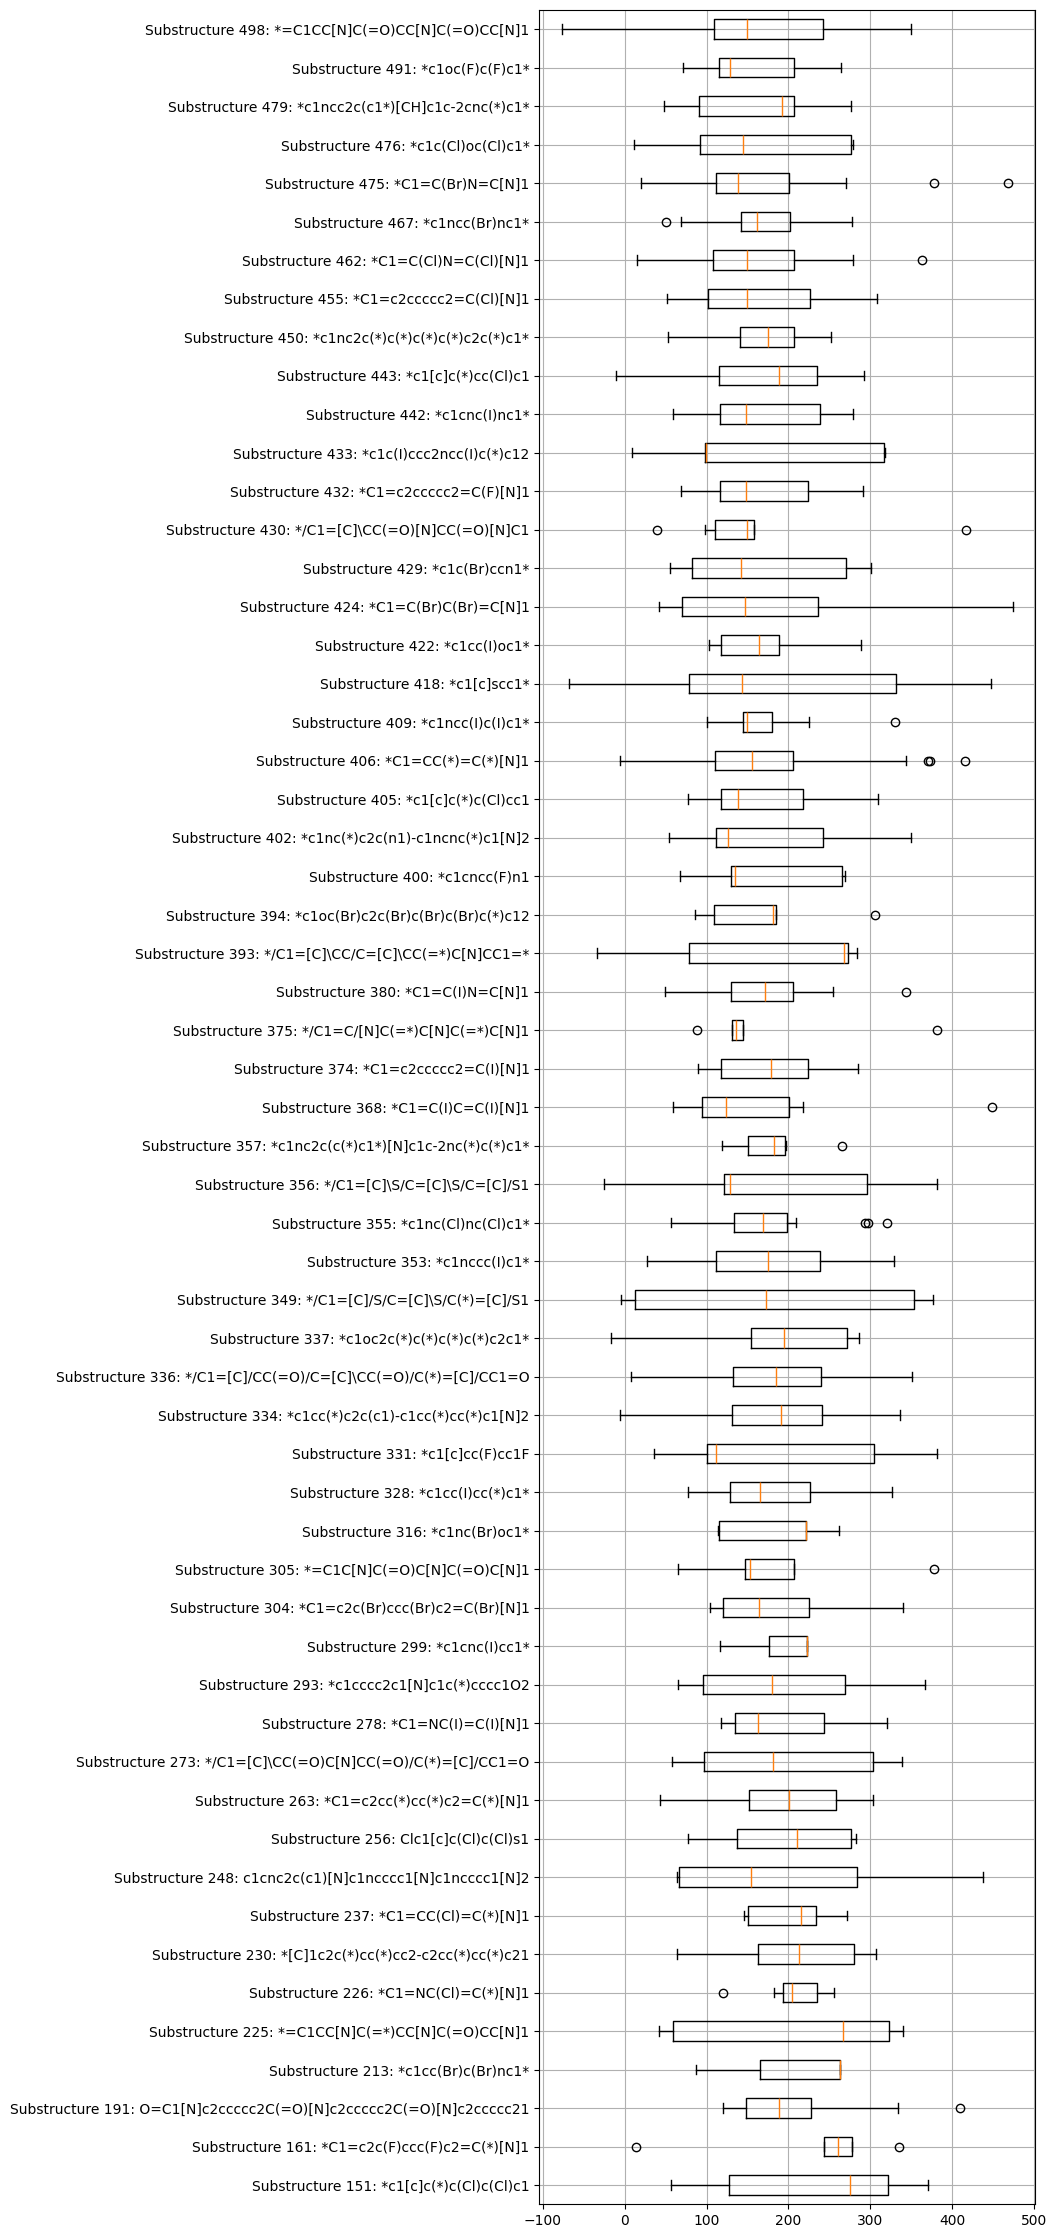

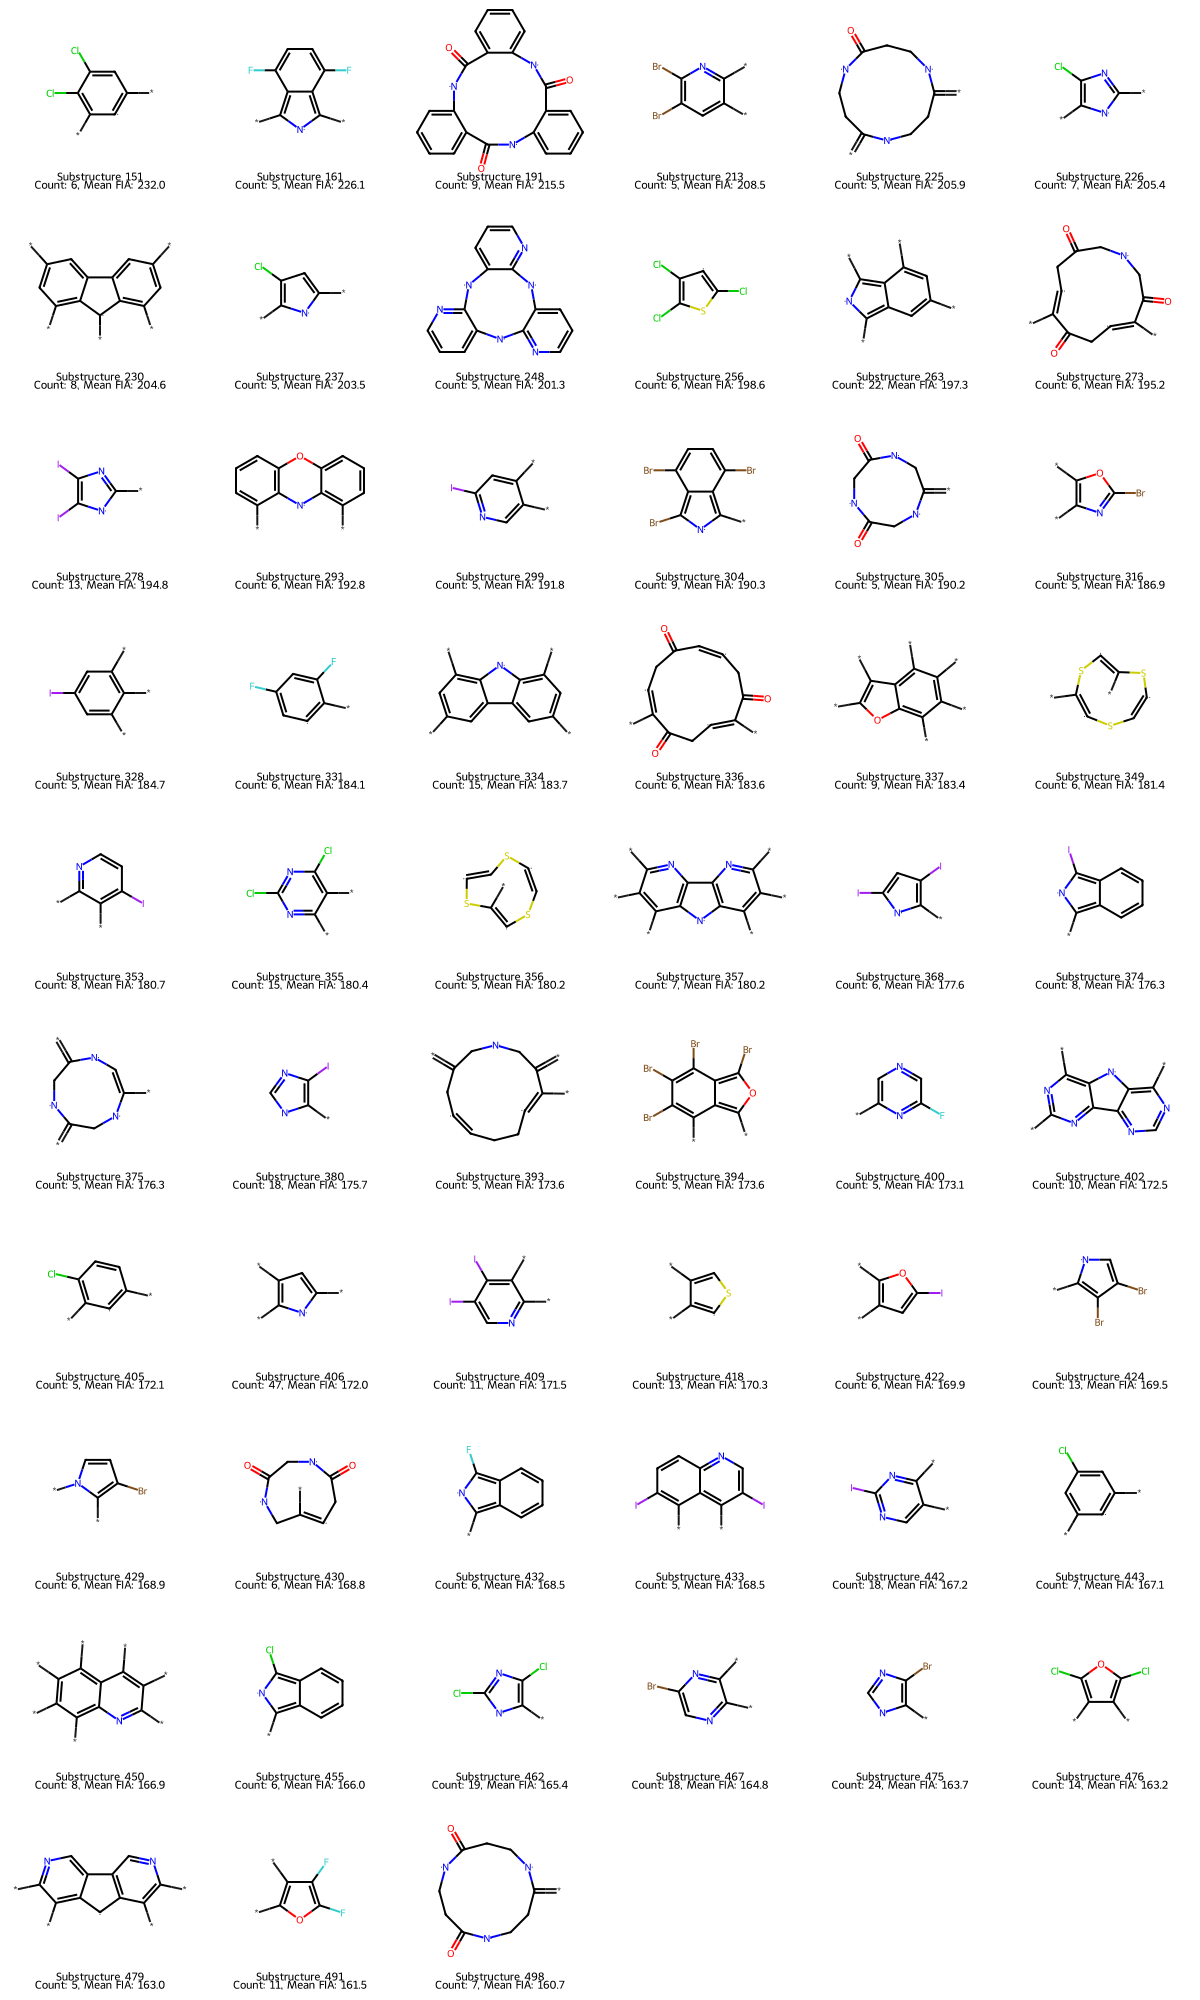

In [10]:
# load substructure_list:
with open("ringsystem.json", "r") as f:
    ringsystems_json = json.load(f)

# two-tuple of list of FIAs and ringsystem count
ringsystems = defaultdict(lambda: [[], 0])
for properties in ringsystems_json.values():
    # these are the substructures
    for substruct in properties[0]:
        ringsystems[substruct][0].append(properties[1])
        ringsystems[substruct][1] += 1

# sort substructure_counts by counts:
ringsystems = dict(sorted(ringsystems.items(), key=lambda item: item[1][1], reverse=True))

# draw substructures:
smiles = list(ringsystems.keys())
counts = [str(x[1]) for x in ringsystems.values()]
mols = [Chem.MolFromSmiles(x) for x in smiles]

num_draw_compounds = 50
#display(Chem.Draw.MolsToGridImage(mols[:num_draw_compounds], molsPerRow=10, legends=counts[:num_draw_compounds], useSVG=True, maxMols=num_draw_compounds))

ringsystems_highest_fia = dict(sorted(ringsystems.items(), key= lambda item: statistics.fmean(item[1][0]), reverse=True))

num_highest_fia = 500
min_count = 5 

vals = []
labels = []
legends = []
mols = []
for i, (k, v) in enumerate(tuple(ringsystems_highest_fia.items())[:num_highest_fia]):
    if v[1] < min_count:
        continue
    vals.append(v[0])
    labels.append(f"Substructure {i}: {k}")
    legends.append(f"Substructure {i}\nCount: {v[1]}, Mean FIA: {statistics.fmean(v[0]):.1f}")
    mols.append(Chem.MolFromSmiles(k))

draw_boxplots(vals, labels, size = len(labels) / 2)
display(Chem.Draw.MolsToGridImage(mols, molsPerRow=6, legends=legends, useSVG=True, maxMols = len(labels)))